# Linear regression,  predict tomorrow’s return as a numeric value

In [76]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
import pandas as pd
df=pd.read_csv(r"C:\Users\elham\OneDrive\Desktop\IT project\Project 1 Forex prediction\EURUSD1440.csv",sep='\t',header=None,
             names=['Date', 'Open', 'High', 'Low', 'Close','Volume'], parse_dates=['Date'])

df=df.reset_index(drop=True)
df=df.sort_values(by="Date",ascending=True)


In [79]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2009-10-22,1.49848,1.50420,1.49413,1.50371,57984
1,2009-10-23,1.50378,1.50590,1.49830,1.50057,72532
2,2009-10-25,1.49934,1.50107,1.49823,1.49878,6591
3,2009-10-26,1.49883,1.50600,1.48420,1.48559,79838
4,2009-10-27,1.48567,1.49260,1.47660,1.48179,79135


In [80]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,5016,5016.000000,5016.000000,5016.000000,5016.000000,5.016000e+03
mean,2017-10-27 10:32:09.186602752,1.190062,1.194145,1.186009,1.190034,1.984452e+05
min,2009-10-22 00:00:00,0.959530,0.967070,0.953570,0.959530,3.000000e+00
25%,2013-10-23 18:00:00,1.097938,1.101433,1.094098,1.097900,8.070125e+04
50%,2017-10-26 12:00:00,1.156560,1.160565,1.153270,1.156525,1.834420e+05
75%,2021-10-31 06:00:00,1.292295,1.296797,1.288028,1.292542,2.500632e+05
max,2025-11-03 00:00:00,1.512570,1.514410,1.503440,1.512520,1.401773e+06
std,NaN,0.116487,0.117034,0.115774,0.116404,1.798798e+05


In [81]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [82]:
df['return'] = df['Close'].pct_change()
df['target'] = df['return'].shift(-1)

df




,Date,Open,High,Low,Close,Volume,return,target
0,2009-10-22,1.49848,1.50420,1.49413,1.50371,57984,NaN,-0.002088
1,2009-10-23,1.50378,1.50590,1.49830,1.50057,72532,-0.002088,-0.001193
2,2009-10-25,1.49934,1.50107,1.49823,1.49878,6591,-0.001193,-0.008800
3,2009-10-26,1.49883,1.50600,1.48420,1.48559,79838,-0.008800,-0.002558
4,2009-10-27,1.48567,1.49260,1.47660,1.48179,79135,-0.002558,-0.006951
...,...,...,...,...,...,...,...,...
5011,2025-10-29,1.16568,1.16660,1.15773,1.16028,125327,-0.004632,-0.002706
5012,2025-10-30,1.16027,1.16374,1.15470,1.15714,108575,-0.002706,-0.002973
5013,2025-10-31,1.15714,1.15775,1.15214,1.15370,73383,-0.002973,-0.000832
5014,2025-11-02,1.15294,1.15383,1.15250,1.15274,11741,-0.000832,-0.000885


In [83]:
df = df.dropna().reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,return,target
0,2009-10-23,1.50378,1.50590,1.49830,1.50057,72532,-0.002088,-0.001193
1,2009-10-25,1.49934,1.50107,1.49823,1.49878,6591,-0.001193,-0.008800
2,2009-10-26,1.49883,1.50600,1.48420,1.48559,79838,-0.008800,-0.002558
3,2009-10-27,1.48567,1.49260,1.47660,1.48179,79135,-0.002558,-0.006951
4,2009-10-28,1.48186,1.48405,1.46888,1.47149,79581,-0.006951,0.008318
...,...,...,...,...,...,...,...,...
5009,2025-10-28,1.16508,1.16686,1.16255,1.16568,82135,0.000515,-0.004632
5010,2025-10-29,1.16568,1.16660,1.15773,1.16028,125327,-0.004632,-0.002706
5011,2025-10-30,1.16027,1.16374,1.15470,1.15714,108575,-0.002706,-0.002973
5012,2025-10-31,1.15714,1.15775,1.15214,1.15370,73383,-0.002973,-0.000832


In [109]:
df['oc_spread'] = (df['Close'] - df['Open']) / df['Open']
df['hl_spread'] = (df['High'] - df['Low']) / df['Close']
df['ema_8'] = df['Close'].ewm(span=8).mean()
df['ema_21'] = df['Close'].ewm(span=21).mean()
df['ema_diff'] = df['ema_8'] - df['ema_21']

for window in [3, 5, 10, 20]:
        df[f'roll_mean_{window}'] = df['return'].rolling(window).mean()
        df[f'roll_std_{window}'] = df['return'].rolling(window).std()
df

,Date,Open,High,Low,Close,Volume,return,target,oc_spread,hl_spread,...,ret_lag_8,ret_lag_13,roll_mean_3,roll_std_3,roll_mean_5,roll_std_5,roll_mean_10,roll_std_10,roll_mean_20,roll_std_20
0,2009-11-08,1.48793,1.48841,1.48594,1.48649,3115,0.001314,0.009337,-0.000968,0.001662,...,0.008318,-0.002088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-11-09,1.48644,1.50197,1.48500,1.50037,80284,0.009337,-0.000913,0.009371,0.011311,...,-0.008061,-0.001193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-11-10,1.50034,1.50206,1.49357,1.49900,80291,-0.000913,-0.000554,-0.000893,0.005664,...,-0.000965,-0.008800,0.003246,0.005392,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-11-11,1.49904,1.50495,1.49498,1.49817,79523,-0.000554,-0.008510,-0.000580,0.006655,...,0.004557,-0.002558,0.002624,0.005817,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-11-12,1.49808,1.50149,1.48201,1.48542,79226,-0.008510,0.003023,-0.008451,0.013114,...,-0.002850,-0.006951,-0.003326,0.004494,0.000135,0.006372,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2025-10-28,1.16508,1.16686,1.16255,1.16568,82135,0.000515,-0.004632,0.000515,0.003697,...,0.000592,-0.003077,0.000865,0.000728,0.000855,0.000515,-0.000358,0.002030,-0.000230,0.002981
4997,2025-10-29,1.16568,1.16660,1.15773,1.16028,125327,-0.004632,-0.002706,-0.004632,0.007645,...,-0.001192,0.003234,-0.000805,0.003367,-0.000244,0.002507,-0.000412,0.002144,-0.000452,0.003139
4998,2025-10-30,1.16027,1.16374,1.15470,1.15714,108575,-0.002706,-0.002973,-0.002698,0.007812,...,-0.003830,0.003654,-0.002275,0.002601,-0.000949,0.002626,-0.000741,0.002225,-0.000345,0.003017
4999,2025-10-31,1.15714,1.15775,1.15214,1.15370,73383,-0.002973,-0.000832,-0.002973,0.004863,...,0.000672,0.004568,-0.003437,0.001044,-0.001619,0.002631,-0.000919,0.002334,-0.000393,0.003052


In [110]:
for lag in [1,2,3,5,8,13]:
        df[f'ret_lag_{lag}'] = df['return'].shift(lag)
df

,Date,Open,High,Low,Close,Volume,return,target,oc_spread,hl_spread,...,ret_lag_8,ret_lag_13,roll_mean_3,roll_std_3,roll_mean_5,roll_std_5,roll_mean_10,roll_std_10,roll_mean_20,roll_std_20
0,2009-11-08,1.48793,1.48841,1.48594,1.48649,3115,0.001314,0.009337,-0.000968,0.001662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-11-09,1.48644,1.50197,1.48500,1.50037,80284,0.009337,-0.000913,0.009371,0.011311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-11-10,1.50034,1.50206,1.49357,1.49900,80291,-0.000913,-0.000554,-0.000893,0.005664,...,NaN,NaN,0.003246,0.005392,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-11-11,1.49904,1.50495,1.49498,1.49817,79523,-0.000554,-0.008510,-0.000580,0.006655,...,NaN,NaN,0.002624,0.005817,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-11-12,1.49808,1.50149,1.48201,1.48542,79226,-0.008510,0.003023,-0.008451,0.013114,...,NaN,NaN,-0.003326,0.004494,0.000135,0.006372,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,2025-10-28,1.16508,1.16686,1.16255,1.16568,82135,0.000515,-0.004632,0.000515,0.003697,...,0.000592,-0.003077,0.000865,0.000728,0.000855,0.000515,-0.000358,0.002030,-0.000230,0.002981
4997,2025-10-29,1.16568,1.16660,1.15773,1.16028,125327,-0.004632,-0.002706,-0.004632,0.007645,...,-0.001192,0.003234,-0.000805,0.003367,-0.000244,0.002507,-0.000412,0.002144,-0.000452,0.003139
4998,2025-10-30,1.16027,1.16374,1.15470,1.15714,108575,-0.002706,-0.002973,-0.002698,0.007812,...,-0.003830,0.003654,-0.002275,0.002601,-0.000949,0.002626,-0.000741,0.002225,-0.000345,0.003017
4999,2025-10-31,1.15714,1.15775,1.15214,1.15370,73383,-0.002973,-0.000832,-0.002973,0.004863,...,0.000672,0.004568,-0.003437,0.001044,-0.001619,0.002631,-0.000919,0.002334,-0.000393,0.003052


In [111]:
n_test = int(len(df) * 0.2)
n_test

1000

In [112]:
df = df.dropna().reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,return,target,oc_spread,hl_spread,...,ret_lag_8,ret_lag_13,roll_mean_3,roll_std_3,roll_mean_5,roll_std_5,roll_mean_10,roll_std_10,roll_mean_20,roll_std_20
0,2009-11-30,1.49931,1.50825,1.49702,1.50343,79595,0.002668,0.003605,0.002748,0.007470,...,-0.003581,0.003806,0.001470,0.001072,0.000944,0.007523,0.000561,0.005599,0.000646,0.005338
1,2009-12-01,1.50351,1.51194,1.49719,1.50885,79059,0.003605,-0.001657,0.003552,0.009776,...,0.000464,0.001504,0.002291,0.001537,-0.000473,0.005666,0.001185,0.005551,0.000761,0.005378
2,2009-12-02,1.50881,1.51096,1.50290,1.50635,80300,-0.001657,-0.000166,-0.001630,0.005351,...,0.005812,-0.006957,0.001539,0.002807,0.001272,0.002027,0.001378,0.005398,0.000211,0.005004
3,2009-12-03,1.50638,1.51398,1.50344,1.50610,78857,-0.000166,-0.013698,-0.000186,0.006998,...,0.000829,0.005264,0.000594,0.002712,0.001010,0.002130,0.001315,0.005414,0.000248,0.004998
4,2009-12-04,1.50618,1.50911,1.48188,1.48547,75670,-0.013698,0.000996,-0.013750,0.018331,...,0.010691,-0.002642,-0.005173,0.007420,-0.001850,0.006954,-0.000636,0.006919,-0.000409,0.005893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,2025-10-28,1.16508,1.16686,1.16255,1.16568,82135,0.000515,-0.004632,0.000515,0.003697,...,0.000592,-0.003077,0.000865,0.000728,0.000855,0.000515,-0.000358,0.002030,-0.000230,0.002981
4978,2025-10-29,1.16568,1.16660,1.15773,1.16028,125327,-0.004632,-0.002706,-0.004632,0.007645,...,-0.001192,0.003234,-0.000805,0.003367,-0.000244,0.002507,-0.000412,0.002144,-0.000452,0.003139
4979,2025-10-30,1.16027,1.16374,1.15470,1.15714,108575,-0.002706,-0.002973,-0.002698,0.007812,...,-0.003830,0.003654,-0.002275,0.002601,-0.000949,0.002626,-0.000741,0.002225,-0.000345,0.003017
4980,2025-10-31,1.15714,1.15775,1.15214,1.15370,73383,-0.002973,-0.000832,-0.002973,0.004863,...,0.000672,0.004568,-0.003437,0.001044,-0.001619,0.002631,-0.000919,0.002334,-0.000393,0.003052


In [113]:
feature_cols = [c for c in df.columns if c.startswith(('ret_', 'roll_', 'ema_'))]
X = df[feature_cols]
y = df['target']


In [114]:
n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

In [115]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [116]:
linreg = LinearRegression()
linreg.fit(X_train_s, y_train)

LinearRegression()

In [117]:
y_pred = linreg.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [118]:
joblib.dump(linreg, "fx_regressor.pkl")
joblib.dump(scaler, "fx_scaler.pkl")
print(" Model saved as fx_regressor.pkl and fx_scaler.pkl")


 Model saved as fx_regressor.pkl and fx_scaler.pkl


In [119]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', ascending=False)


print(coef_df.head(5))


        Feature  Coefficient
2      ema_diff     0.000257
6     ret_lag_5     0.000180
3     ret_lag_1     0.000131
14  roll_std_10     0.000101
9   roll_mean_3     0.000054


# Predict next-day direction (up/down) using classification

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

df1=pd.read_csv(r"C:\Users\elham\OneDrive\Desktop\IT project\Project 1 Forex prediction\EURUSD1440.csv",sep='\t',header=None,
             names=['Date', 'Open', 'High', 'Low', 'Close','Volume'], parse_dates=['Date'])


df1 = df1.sort_values('Date').reset_index(drop=True)



In [125]:
df1['return'] = df1['Close'].pct_change()
df1['target'] = df1['return'].shift(-1)
df1 = df1.dropna().reset_index(drop=True)

def make_features(d):
    for lag in [1,2,3,5,8,13]:
        d[f'ret_lag_{lag}'] = d['return'].shift(lag)
    for window in [3,5,10,20]:
        d[f'roll_mean_{window}'] = d['return'].rolling(window).mean()
        d[f'roll_std_{window}'] = d['return'].rolling(window).std()
    d['ema_8'] = d['Close'].ewm(span=8).mean()
    d['ema_21'] = d['Close'].ewm(span=21).mean()
    d['ema_diff'] = d['ema_8'] - d['ema_21']
    if all(c in d.columns for c in ['High','Low','Open']):
        d['hl_spread'] = (d['High'] - d['Low']) / d['Close']
        d['oc_spread'] = (d['Close'] - d['Open']) / d['Open']
    return d

In [131]:
df1 = make_features(df1).dropna().reset_index(drop=True)

df1['direction'] = (df1['target'] > 0).astype(int)  # 1 = up, 0 = down

feature_cols = [c for c in df1.columns if c.startswith(('ret_', 'roll_', 'ema_', 'hl_', 'oc_'))]
X = df1[feature_cols]
y = df1['direction']


n_test = int(len(df) * 0.2)
X_train, X_test = X.iloc[:-n_test], X.iloc[-n_test:]
y_train, y_test = y.iloc[:-n_test], y.iloc[-n_test:]

# 6. Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 7. Train classifier (Logistic Regression)
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_s, y_train)
y_pred_lr = logreg.predict(X_test_s)
y_prob_lr = logreg.predict_proba(X_test_s)[:,1]

In [135]:

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_pred_lr):.4f}")

# 9. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.4885
F1 Score: 0.5520
ROC-AUC : 0.4853

Confusion Matrix:
[[174 315]
 [198 316]]


In [138]:
y_pred_lr

array([0, 1, 1, ..., 1, 1, 1])

In [139]:
y_prob_lr 

array([0.47299702, 0.51880797, 0.52463171, ..., 0.50934369, 0.50011524,
       0.53371607])

# Neural Network Classifier

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

df2 = pd.read_csv(r"C:\Users\elham\OneDrive\Desktop\IT project\Project 1 Forex prediction\EURUSD1440.csv",
                  parse_dates=['Date'], header=None, sep='\t', names=['Date', 'Open', 'High', 'Low', 'Close','Volume'] )
df2=df2.sort_values('Date').reset_index(drop=True)


df2['return']=df2['Close'].pct_change()
df2['target']=df2['return'].shift(-1)
df2=df2.dropna().reset_index(drop=True)

def features_engineering(d):
    for window in [3,5,10,20]:
        d[f'roll_mean_{window}']=d['return'].rolling(window).mean()
        d[f'roll_std_{window}']=d['return'].rolling(window).std()
    d['ewm_8']=d['Close'].ewm(span=8).mean()
    d['ewm_21']=d['Close'].ewm(span=21).mean()
    d['ewm_diff']= d['ewm_8']-d['ewm_21']
    if all(c in d.columns for c in ['High','Low','Open']):
        d['hl_spread']=(d['High']-d['Low'])/d['Close']
        d['oc_spread']=(d['Close']-d['Open'])/d['Open']
    return d    

df2=features_engineering(df2).dropna().reset_index(drop=True)
df2['direction'] = (df2['target'] > 0).astype(int)



feature_cols=[c for c in df2.columns if c.startswith(('hl_','oc_','ewm_','roll_'))]
#Converts the selected DataFrame into a NumPy array
X=df2[feature_cols].values
Y=df2['direction'].values


#Time based split(20% as test)

n_test = int(len(df2) * 0.2)
X_train, X_test = X[:-n_test], X[-n_test:]
Y_train, Y_test = Y[:-n_test], Y[-n_test:]


scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


#Build Neural Network model
model=Sequential([
    Dense(64,activation='relu',),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid') # sigmoid for binary classification
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[es],
    verbose=0
)

y_prob=model.predict(X_test).flatten()
y_pred=(y_prob>0.5).astype(int)


acc = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc = roc_auc_score(Y_test, y_prob)

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print(f"Accuracy : {acc:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc:.4f}")



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Confusion Matrix:
[[194 294]
 [182 329]]
Accuracy : 0.5235
F1 Score : 0.5802
ROC AUC  : 0.5276


# Multi-Class Forex Trend Prediction

In [4]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Load and sort the data
df2 = pd.read_csv(
    r"C:\Users\elham\OneDrive\Desktop\IT project\Project 1 Forex prediction\EURUSD1440.csv",
    parse_dates=['Date'],
    header=None,
    sep='\t',
    names=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
)
df2 = df2.sort_values('Date').reset_index(drop=True)

# 2. Compute returns and next-day target
df2['return'] = df2['Close'].pct_change()
df2['target'] = df2['return'].shift(-1)
df2 = df2.dropna().reset_index(drop=True)

# 3. Multi-class labeling (5 categories)
def label_from_return_tol(r, tol=0.0001):
    if r > 0.005:
        return 4   # Strong Uptrend
    elif r > tol:
        return 3   # Mild Uptrend
    elif -tol <= r <= tol:
        return 2   # Flat
    elif r > -0.005:
        return 1   # Mild Downtrend
    else:
        return 0   # Strong Downtrend

df2['label'] = df2['target'].apply(lambda r: label_from_return_tol(r, tol=0.0001))

# 4. Feature engineering
def features_engineering(d):
    for window in [3, 5, 10, 20]:
        d[f'roll_mean_{window}'] = d['return'].rolling(window).mean()
        d[f'roll_std_{window}'] = d['return'].rolling(window).std()
    d['ewm_8'] = d['Close'].ewm(span=8).mean()
    d['ewm_21'] = d['Close'].ewm(span=21).mean()
    d['ewm_diff'] = d['ewm_8'] - d['ewm_21']
    if all(c in d.columns for c in ['High', 'Low', 'Open']):
        d['hl_spread'] = (d['High'] - d['Low']) / d['Close']
        d['oc_spread'] = (d['Close'] - d['Open']) / d['Open']
    return d

df2 = features_engineering(df2).dropna().reset_index(drop=True)

# 5. Select features and prepare arrays
feature_cols = [c for c in df2.columns if c.startswith(('hl_', 'oc_', 'ewm_', 'roll_'))]
X = df2[feature_cols].values
Y = df2['label'].values  # <-- multi-class labels

# 6. Time-based split (last 20% as test)
n_test = int(len(df2) * 0.2)
X_train, X_test = X[:-n_test], X[-n_test:]
Y_train, Y_test = Y[:-n_test], Y[-n_test:]

# 7. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




n_features = X_train.shape[1]

nn=Sequential([Dense(128,activation='relu',input_shape=(n_features,)),
               Dropout(0.3),Dense(64,activation='relu'),Dropout(0.2),Dense(5,activation='softmax')])
nn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
nn.fit(X_train ,Y_train,validation_split=0.2,epochs=100,batch_size=32,callbacks=[es],verbose=0)

y_prob=nn.predict(X_test)
y_pred=np.argmax(y_prob,axis=1)
#evaluate_model(nn,X_test,Y_test)



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step



=== Evaluation: RandomForestClassifier ===
Accuracy: 0.3923923923923924
F1 (macro): 0.18866970545115289


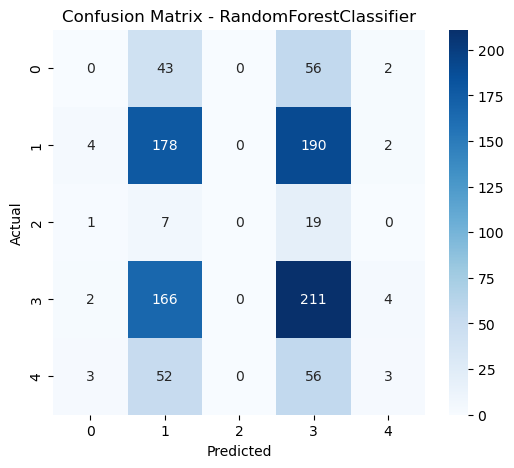

array([3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 4, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 3, 0, 1, 1, 1, 0, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1, 3,
       3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 3, 3, 1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 4, 3, 3, 1, 4, 1, 1, 1,
       1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3,

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the model
rf = RandomForestClassifier(
    n_estimators=200,       # fixed typo
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, Y_train)

# 2. Define evaluation function
def evaluate_model(model, X_test, Y_test, name="model"):
    y_pred = model.predict(X_test)
    print(f"\n=== Evaluation: {name} ===")
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("F1 (macro):", f1_score(Y_test, y_pred, average='macro'))
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return y_pred

# 3. Run evaluation
evaluate_model(rf, X_test, Y_test, name="RandomForestClassifier")


In [8]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb = XGBClassifier(
    use_label_encoder=False,   # prevents deprecation warning
    eval_metric='mlogloss',    # good for multi-class classification
    random_state=42,
    n_estimators=300,          # you can tune this
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    
)
tscv = TimeSeriesSplit(n_splits=5)
scores_acc = cross_val_score(xgb, X_train, Y_train, cv=tscv, scoring='accuracy')
scores_f1 = cross_val_score(xgb, X_train, Y_train, cv=tscv, scoring='f1_macro')

print("XGBoost TimeSeries CV Accuracy:", scores_acc)
print("Mean Accuracy:", scores_acc.mean())
print("XGBoost TimeSeries CV Macro F1:", scores_f1)
print("Mean F1:", scores_f1.mean())

XGBoost TimeSeries CV Accuracy: [0.22522523 0.28828829 0.34384384 0.36186186 0.39489489]
Mean Accuracy: 0.3228228228228228
XGBoost TimeSeries CV Macro F1: [0.1700682  0.1916636  0.20315606 0.18458585 0.19455384]
Mean F1: 0.18880550816402927


# OvO with Logistic Regression


=== Evaluation: model ovo ===
Accuracy: 0.36736736736736736
F1 (macro): 0.16028707353540844


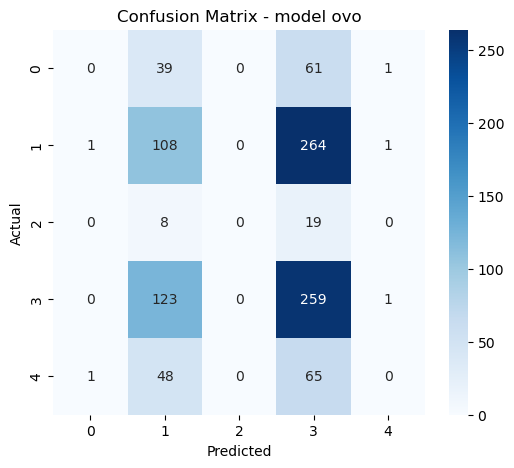

array([3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 1, 3, 1, 1, 1, 1, 1, 3, 1, 4, 3, 4,
       1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [9]:

from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns

#  base binary classifier
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Wrap it in One-vs-One strategy
ovo=OneVsOneClassifier(log_reg)

# Fit on training data
ovo.fit(X_train, Y_train)

# Predict on test data
y_pred = ovo.predict(X_test)

evaluate_model(ovo, X_test, Y_test, name="model ovo")

In [10]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(ovo, X_train, Y_train, cv=tscv, scoring='accuracy')
print("TimeSeries CV accuracies:", scores)
print("Mean:", scores.mean())


TimeSeries CV accuracies: [0.35585586 0.36036036 0.38138138 0.37687688 0.39039039]
Mean: 0.372972972972973
